# Cartpole Balance Game

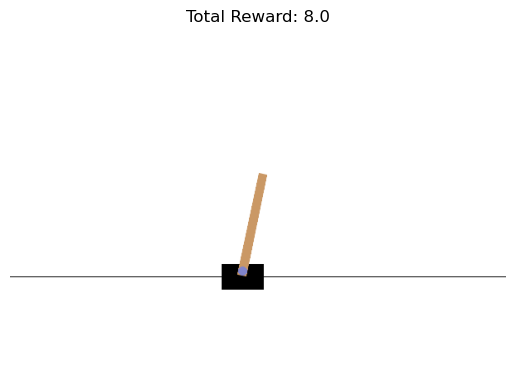

In [2]:
# Game and rewards

import gym
import numpy as np
import random
import math
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time

# Initialize the CartPole environment with Jupyter-compatible rendering
env = gym.make("CartPole-v1", render_mode='rgb_array')

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Epsilon-greedy strategy for exploration
epsilon_min = 0.01
epsilon_decay = 0.995
episodes = 1000

# Q-table initialization
num_buckets = (1, 1, 6, 12)  # Discretize the state space into buckets
num_actions = env.action_space.n
q_table = np.zeros(num_buckets + (num_actions,))

# Function to discretize continuous state space into discrete buckets
def discretize_state(state):
    upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50)]
    lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50)]
    
    ratios = [(state[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(state))]
    new_state = [int(round((num_buckets[i] - 1) * ratios[i])) for i in range(len(state))]
    new_state = [min(num_buckets[i] - 1, max(0, new_state[i])) for i in range(len(state))]
    return tuple(new_state)

# Q-learning algorithm
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore: Random action
    else:
        return np.argmax(q_table[state])  # Exploit: Choose action with max Q-value

def update_q_table(state, action, reward, next_state):
    best_next_action = np.argmax(q_table[next_state])
    q_target = reward + gamma * q_table[next_state][best_next_action]
    q_table[state][action] += alpha * (q_target - q_table[state][action])

# Training the agent
for episode in range(episodes):
    state, _ = env.reset()  # Reset the environment and get the initial state
    state = discretize_state(state)
    done = False
    total_reward = 0

    while not done:
        # No rendering during training for efficiency
        action = choose_action(state)
        next_state, reward, done, _, _ = env.step(action)  # Handle extra 'info' dictionary
        next_state = discretize_state(next_state)

        update_q_table(state, action, reward, next_state)
        state = next_state
        total_reward += reward

        if done:
            break

    # Decay epsilon
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    if episode % 100 == 0:
        print(f"Episode {episode}, Total Reward: {total_reward}")

# Test the agent (with rendering)
for _ in range(5):
    state, _ = env.reset()  # Reset the environment for testing
    state = discretize_state(state)
    done = False
    total_reward = 0  # Reset the total reward for this test episode
    
    while not done:
        clear_output(wait=True)  # Clear output for a smooth rendering
        img = env.render()  # Render and capture the frame as an RGB array
        plt.imshow(img)  # Display the frame
        plt.axis('off')  # Turn off axis for better visualization
        plt.title(f"Total Reward: {total_reward}")  # Display total reward
        plt.show()
        
        action = np.argmax(q_table[state])
        next_state, reward, done, _, _ = env.step(action)  # Handle extra 'info' dictionary
        state = discretize_state(next_state)
        
        total_reward += reward  # Update total reward
        time.sleep(0.05)  # Pause to slow down the rendering and make it visible

env.close()

**Advanced version of this game:** https://jeffjar.me/cartpole.html

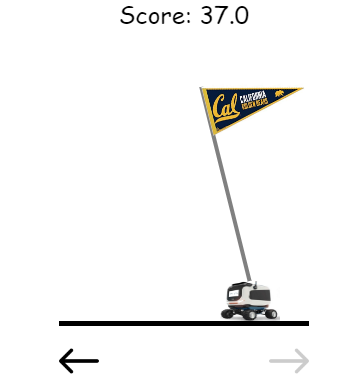